In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


In [2]:
def how_deep(clusters: list):
    if clusters and isinstance(clusters, list):
        return max(how_deep(cluster) for cluster in clusters) + 1
    return 0


In [3]:
def del_dups(data: list):
    new_list = []

    for l in data:
        if l not in new_list:
            new_list.append(l)
    return new_list

In [4]:
def plot_dendrogram(dists: list):
    dendrogram(dists) 
    plt.show()

In [15]:
def clustering(data: list):
    c = copy.deepcopy(data)
    c = del_dups(c)
    print(c)
    new_index = len(c)  # index for new cluster 
    final_dists = np.zeros((len(c) - 1, 4))  # final dist matrix 
    accessible_indexes = list(range(len(c)))  #  indexes to update dists
    dist_dict_before = {}  # dist matrix of previous iteration
    '''
    calculating first distances
    '''
    for i in range(len(c)):
        for j in range(len(c)):
            dist_dict_before[(i, j)] = np.linalg.norm(np.array(c[i]) - np.array(c[j]))  # fill dist matrix on 1 iter
    print(dist_dict_before)
    print("-----------------------")
    '''
    starting clustering
    '''
    iteration = 0
    while len(dist_dict_before) > 2:  # 1 clusters left
        min_val = np.inf
        indexes = (0, 0)
        '''
        get min value from dist matrix and its indexes in matrix
        '''
        for key, val in dist_dict_before.items():
            if val < min_val and val != 0:
                min_val = val
                indexes = key
        print(f'min val: {min_val}')
        print(f'indexes: {indexes}')
        new_cluster = [c[indexes[0]], c[indexes[1]]]
        c.append(new_cluster)
        print(f'new cluster: {new_cluster}')
        '''
        update final_dists
        '''
        final_dists[iteration][0] = indexes[0]
        final_dists[iteration][1] = indexes[1]
        final_dists[iteration][2] = min_val
        final_dists[iteration][3] = how_deep(new_cluster)

        dist_dict = copy.deepcopy(dist_dict_before)  # creating new dist matrix
        '''
        delete rows and columns of clusters that were merged
        '''
        for key in dist_dict_before.keys():
            if indexes[0] in key or indexes[1] in key:
                del dist_dict[key]
        accessible_indexes.remove(indexes[0])
        accessible_indexes.remove(indexes[1])
        '''
        merging clusters and updating dist matrix
        '''
        for i in accessible_indexes:
            dist_dict[(i, new_index)] = ((dist_dict_before[(i, indexes[0])] + dist_dict_before[(i, indexes[1])]) / 2) \
                                        - \
                                        (abs(dist_dict_before[(i, indexes[0])] - dist_dict_before[(i, indexes[1])]) / 2)
            dist_dict[(new_index, i)] = dist_dict[(i, new_index)]
        dist_dict[(new_index, new_index)] = 0
        accessible_indexes.append(new_index)
        '''
        updating dists and counters
        '''
        dist_dict_before = copy.deepcopy(dist_dict)
        new_index += 1
        iteration += 1
        print(accessible_indexes)
        print(dist_dict_before)
        print("-----------------------")

    c = c[-1]  # final clusters
    '''
    printing final results
    '''
    print(f'C: {c}')
    print(f'Distance matrix: {final_dists}')
    
    plot_dendrogram(final_dists)  # plot dendrogram
    return c, final_dists

[[1, 1], [2, 3], [3, 3], [2, 0], [4, 0], [5, 12]]
{(0, 0): 0.0, (0, 1): 2.23606797749979, (0, 2): 2.8284271247461903, (0, 3): 1.4142135623730951, (0, 4): 3.1622776601683795, (0, 5): 11.704699910719626, (1, 0): 2.23606797749979, (1, 1): 0.0, (1, 2): 1.0, (1, 3): 3.0, (1, 4): 3.605551275463989, (1, 5): 9.486832980505138, (2, 0): 2.8284271247461903, (2, 1): 1.0, (2, 2): 0.0, (2, 3): 3.1622776601683795, (2, 4): 3.1622776601683795, (2, 5): 9.219544457292887, (3, 0): 1.4142135623730951, (3, 1): 3.0, (3, 2): 3.1622776601683795, (3, 3): 0.0, (3, 4): 2.0, (3, 5): 12.36931687685298, (4, 0): 3.1622776601683795, (4, 1): 3.605551275463989, (4, 2): 3.1622776601683795, (4, 3): 2.0, (4, 4): 0.0, (4, 5): 12.041594578792296, (5, 0): 11.704699910719626, (5, 1): 9.486832980505138, (5, 2): 9.219544457292887, (5, 3): 12.36931687685298, (5, 4): 12.041594578792296, (5, 5): 0.0}
-----------------------
min val: 1.0
indexes: (1, 2)
new cluster: [[2, 3], [3, 3]]
[0, 3, 4, 5, 6]
{(0, 0): 0.0, (0, 3): 1.4142135623

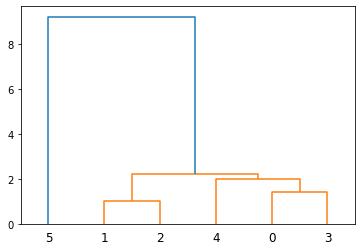

In [16]:
if __name__ == '__main__':
    t = [[1, 1],
         [2, 3],
         [3, 3],
         [2, 0],
         [4, 0],
         [5, 12]]
    clustering(t)
